# Municipal Wastewater Aeration

Elizabeth Horwath, Emily Clements, and Gbemisola Okunzua  
Final Project for CBE 30338, Spring 2017


## Problem Statement 

This project examined municipal wastewater treatment, specifically looking at the aeration tanks in the biodegradation process. Aeration is used in wastewater treatment in order to facilitate the aerobic bacteria that consume and reduce organic waste (City of South Bend Indiana). The compressed air that is introduced to the water allows bacteria that is already present in the waste to proliferate. Later, the bacterial colonies are settled out of the water and recycled back into the aeration tanks (Oxymem). 

A large amount of municipal water returns to the lakes in the form of treated wastewater. Fish, like bacteria, need oxygen to survive and grow. Around 9 mg/L or more dissolved oxygen supports abundant fish populations (Water Research Center “Dissolved”). However, too much oxygen in the water can result in oversaturation. Additionally, ammonia in the unionized form is quite toxic to fish in concentrations ranging from 0.54 to 22.8 mg/L (Water Research Center. "Ammonia"). Thus, control of dissolved oxygen levels while maximizing aeration efficiency and keeping ammonia levels low is very important to sustain nature.  The more process control contributions to the aeration process and technology, the more safe are our waters, both municipal and major water bodies. 

The goal of this project is twofold. First, the aeration process for a simple wastewater treatment for municipal water, involving the cells, sludge product, ammonia, and dissolved oxygen concentrations will be simulated in a process notebook.  Secondly, a feedback control loop involving proportional integral control will be used to set the dissolved oxygen concentration to 9 mg/L while keeping the  ammonia concentration below  0.5 mg/L.


## Theoretical Development 
A model for a bioreactor is used to show the cell growth in a water purification aeration tank. This step of water purification comes after mechanical filtration and before chlorination. It approximates the method used at the South Bend Municipal Water Treatment Plant. During aeration, aerobic bacteria present in wastewater consume ammonia and dissolved oxygen to create sludge. Extra oxygen is bubbled through the tank to promote aerobic bacterial growth. The sludge is separated from the effluent and used as fertilizer, while the purified water goes on to further treatment. 

![](Process_Controls.png)

The core assumptions made were that the bioreactor is continuous, instead of batch. The volume of the tank is unchanging with the same flow rate from outlet and inlet streams. Cells use oxygen and ammonia, and create sludge. The bioreactor is being continuously mixed. Water is inert but is modeled by its dilution effects.
Values such as the yield coefficients and decay rate were approximated based on literature values. It was found that yield coefficients are usually around the range of 0.4 to 0.8. and decay rates in the range of 0.025 to 0.075. 

First, the following variables were defined:

X = Cell concentration (mg/ liter)

V = Tank volume (liters)

$C_0$ = Oxygen concentration (mg/ liter)

$C_A$= Ammonia concentration (mg/liter)

P = Sludge concentration (mg/liter)

F(t) = Flow rate (liters/hour)

t= time (hours)

$\mu$= Cell specific growth rate 

$r_g$ = Growth rate of cells

$r_d$ = Cell decay rate

$Y_{O_2}$ = Oxygen half-saturation constant

$Y_{A_2}$ = Ammonia half-saturation constant

$Y_{O/X}$ =Ratio of mass of oxygen consumed to mass of cells formed

$Y_{A/X}$= Ratio of mass of ammonia consumed to mass of cells formed

$O_f$ = Oxygen inlet feed (grams/liter)

$X_f$= Cell inlet feed (grams/liter)

$A_f$ = Ammonia inlet feed (grams/liter)

D = Dilution coefficient, which is equal to $\frac{F}{V}$


The cell-specific growth rate, $\mu$ is written using a form of the Monod model, which is dependent on both oxygen and ammonia.
$$\mu = \mu_{max} \frac{C_O}{C_O+K_O} \frac{C_A}{C_A+K_A}$$

#### Mass Balances 
Mass balances were done on the cells, the oxygen, ammonia and sludge, as can be seen below. 

##### Cells: 
$$\frac{dVX}{dt}=F*(X_f + fX - X)+(\mu -b)XV$$
Recognizing that $\frac{dV}{dt}=0$, meaning volume is constant, and dividing through by it gives:

$$\frac{dX}{dt}=\frac{F}{V}*(X_f - fX - X)+r_g-r_d$$

Where the decay rate, $r_d$, is $bX$, where b is a constant.
$r_g$, the growth rate was defined as $r_g=\mu X$

##### Oxygen: 
$$\frac{dVC_O}{dt}=FC_{OF}-Y_{O/X}Vr_g-FC_O$$
Which, when divided by the constant volume, gives 
$$\frac{dC_O}{dt}=\frac{F}{V}(C_{OF}-C_O)-Y_{C_O/X}r_g$$

##### Ammonia: 
$$\frac{dVC_A}{dt}=FC_{AF}-Y_{A/X}Vr_g-FC_A$$
Dividing by V gives
$$\frac{dC_A}{dt}=\frac{F}{V}(C_{AF}-C_A)-Y_{C_A/X}r_g$$

##### Sludge Product: 
$$\frac{dVP}{dt}=Y_{P/X}Vr_g+FfP-FP$$
Dividing by V gives
$$\frac{dP}{dt}=\frac{F}{V}(fP-P)+Y_{P/X}r_g$$

The dilution factor,D, is defined as $\frac{F}{V}$

After running the cell, if the slider is changed, The first "code" cell must be run again in order for the correct steady state valus to be obtained for figure 1.

## Results

![](Figure1a1.png)
![](Figure1a2.png)

Figure 1 shows the concentrations of substances in the aeration tank over time with no control element. There is a constant stream of oxygen being supplied, but the oxygen level is not controlled.The recycle slider controls the fraction of the solid effluent that gets recycled back into the tank. The recycle stream is composed of sludge product and cells. With a greater fraction of recycled material, both cell concentration and sludge concentration are increased. An increase in cell concentration is beneficial because there are more cells to break down the ammonia, but a build-up of sludge in the aeration tank is not ideal. Because of these constraints, the recycle stream was set to a fraction of 0.10, which both prevented a build-up of sludge and increased the cell count. In Figure 1, the ammonia is not lowered to the desired level of less than 0.50 mg/L. Because ammonia in high levels is toxic, this must be countered with an increased supply of oxygen that would cause the cell concentration to increase, and thus deplete the ammonia. Another cause of concern is the low oxygen concentration in the outlet stream. The cells used up the oxygen as they grew, which quickly led to a depletion. Because the purified water will eventually flow back into a river, the oxygen concentration in the water must also be at a high enough concentration to enable fish to live. In order to get the desired concentration of the oxygen and ammonia, a controller was introduced. Figure 1 is shown below with the desired recycle fraction of 0.10.

![](Figure2a1.png)
![](Figure2a2.png)

![](Figure3b1.png)
![](Figure3b2.png)

A proportional-integral control was implemented on the oxygen, as shown in Figures 2 and 3. Figure 2 just shows the oxygen on its own, while Figure 3 shows all of the substances in the tank. A proportional control was tried first, but the oxygen setpoint was not reached. Next, an integral control element was added. The oxygen setpoint of 9.0 mg/L was reached with the proportional-integral control, so PID was not implemented. A PI tuning that was found to be effective for this system was a recycle fraction of 0.10, a Kp of 0.45, and a Ki of 0.04. This created a slight overshoot of the oxygen, but allowed the setpoint to be reached in 150 hours, which was a reasonable amount of time for the system. After 27 hours, oxygen concentration grows at a higher rate because the cell concentration starts to decrease to the steady state value. The ammonia concentration fell to a steady-state concentration of 0.40 mg/L, which is not too high to be released back into the waterstream. The sludge concentration was also small at 1.95 mg/L, and there was not a build-up of sludge in the aeration tank. The concentration of cells in the tank oscillated before coming to a steady-state value of 5.20 mg/L. The effluent sludge was sent on to be used as fertilizer, and the purified water with a low concentration of ammonia and a high enough concentration of oxygen was sent on for further chemical treatment. Figure 2 and Figure 3 are shown below with the desired tuning and oxygen setpoint.

## Simulation

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy.integrate import odeint
from scipy.optimize import fsolve
#import seaborn as sns
#sns.set_context('talk')

# parameter values

mumax = 0.20      # 1/hour
Ko = 1.00         # mg/liter
Ka = 0.50         # mg/liter
Yox = 0.8         # mg/mg 
Yax = 0.5         # mg/mg
Ypx = 0.2         # mg/mg
Of = 4.0          # mg/liter
Af = 5.0          # mg/liter
Xf = 5            # mg/liter
b=0.075           # 1/hour


# inlet flowrate

def D(t):
    return 0.04

# reaction rates

def mu(O,A):
    return mumax*O/(Ko + O)*A/(Ka + A)

def Rg(X,O,A):
    return mu(O, A)*X

def Rp(X,O,A):
    return Ypx*Rg(X,O, A)

def Rd(X):
    return b*X

# differential equations

f = 0.01

def xdot(x,t):
    X,P,O,A = x
    dX = D(t)*(Xf-X)+(D(t)*f*X) + Rg(X,O,A)-Rd(X)
    dP = -D(t)*P + D(t)*f*P+ Rp(X,O,A)
    dO = (D(t)*(Of-O) - Rg(X,O,A)*Yox)
    dA = D(t)*(Af-A) - Rg(X,O,A)*Yax
    return [dX,dP,dO,dA]





<function __main__.sim>

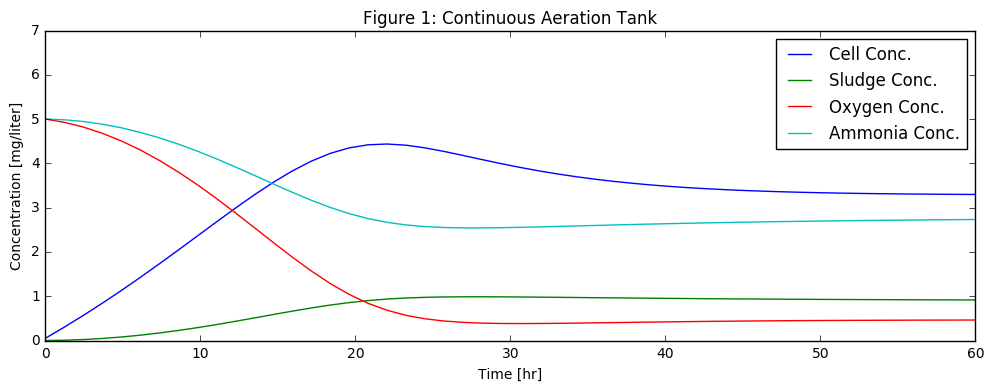

In [2]:
from ipywidgets import interact

# Simulation 
IC = [0.05, 0.0, 5.0, 5.0]

t = np.linspace(0,60)

def sim(Recycled=0.01):
    global f
    f = Recycled
    sol = odeint(xdot,IC,t)
    X,P,O,A = sol.transpose()

    plt.figure(figsize=(12,4))
    plt.plot(t,X)
    plt.plot(t,P)
    plt.plot(t,O)
    plt.plot(t,A)

    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [mg/liter]')
    plt.title('Figure 1: Continuous Aeration Tank')
    plt.legend(['Cell Conc.',
            'Sludge Conc.',
            'Oxygen Conc.',
           'Ammonia Conc.'])
    plt.ylim(0,7)
    
interact(sim,Recycled=(0,1,.01))




<function __main__.sim>

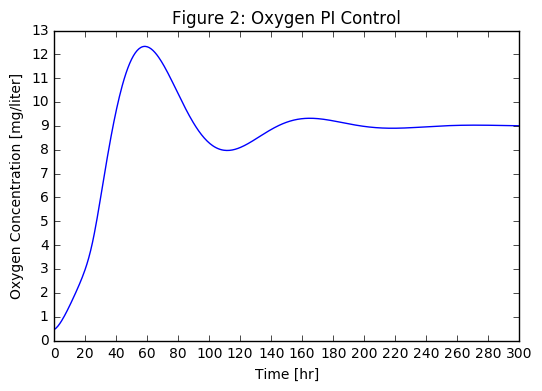

In [3]:
IC = [0.05, 0.0, 5.0, 5.0]

t = np.linspace(0,120)
sol = odeint(xdot,IC,t)
X,P,O,A = sol.transpose()

from ipywidgets import interact

xss = [X[49], P[49], O[49], A[49], 0]


def xdot(x,t):
    X,P,O,A, I = x
    Oa = Of + kp*(9-O) + ki*I
    dX = D(t)*(Xf-X)+(D(t)*f*X) + Rg(X,O,A)-Rd(X)
    dP = -D(t)*P + Rp(X,O,A)
    dO = (D(t)*(Oa-O) - Rg(X,O,A)*Yox)
    dA = D(t)*(Af-A) - Rg(X,O,A)*Yax
    dI = 9 - O
    return [dX,dP,dO,dA,dI]

# Simulation 

t2 = np.linspace(0,300, 500)

def sim(Recycled=0.1, Kp = 0.1, Ki=0.1):
    global f
    global kp
    global ki
    f = Recycled
    kp = Kp
    ki = Ki
    sol2 = odeint(xdot,xss,t2)
    X,P,O,A,I = sol2.transpose()

    
    plt.figure(1)
    plt.locator_params(nbins=15)
    plt.plot(t2,O)
    
    plt.xlabel('Time [hr]')
    plt.ylabel('Oxygen Concentration [mg/liter]')
    plt.title('Figure 2: Oxygen PI Control')
   

interact(sim,Recycled=(0,1,.01),Kp=(0,.5,.01),Ki=(0,.5,.01))




<function __main__.sim>

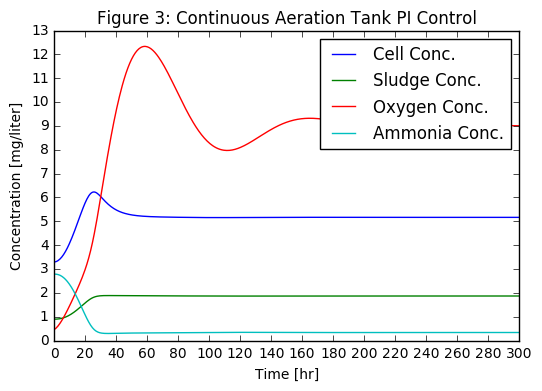

In [4]:
from ipywidgets import interact


def xdot(x,t):
    X,P,O,A, I = x
    Oa = Of + kp*(9-O) + ki*I
    dX = D(t)*(Xf-X)+(D(t)*f*X) + Rg(X,O,A)-Rd(X)
    dP = -D(t)*P + Rp(X,O,A)
    dO = (D(t)*(Oa-O) - Rg(X,O,A)*Yox)
    dA = D(t)*(Af-A) - Rg(X,O,A)*Yax
    dI = 9 - O
    return [dX,dP,dO,dA,dI]

# Simulation 
IC = [0.05, 0.0, 5.0, 5.0]

t2 = np.linspace(0,300, 500)

def sim(Recycled=0.1, Kp = 0.1, Ki=0.1):
    global f
    global kp
    global ki
    f = Recycled
    kp = Kp
    ki = Ki
    sol2 = odeint(xdot,xss,t2)
    X,P,O,A,I = sol2.transpose()

    
    plt.plot(t2,X)
    plt.plot(t2,P)
    plt.plot(t2,O)
    plt.plot(t2,A)
    plt.locator_params(nbins=25)

    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [mg/liter]')
    plt.title('Figure 3: Continuous Aeration Tank PI Control')
    plt.legend(['Cell Conc.',
            'Sludge Conc.',
            'Oxygen Conc.',
           'Ammonia Conc.'])
    plt.ylim(0,13)

interact(sim,Recycled=(0,1,.01),Kp=(0,.5,.01),Ki=(0,.5,.01))



## Conclusion
 
For this model and the parameters that were chosen, the preferred tuning was discovered to be kp=0.45 and ki=0.04 for a recycling fraction of 0.10.
 
With this tuning, the oxygen concentration was kept at the recommended concentration of 9.00 mg/L. This concentration is a safe amount to allow the water to be returned to a river or lake, as the South Bend Wastewater Treatment Facility does with the wastewater that it treats into the Saint Joseph River.
 
When properly tuned, there was only a small overshoot for the oxygen before it leveled out at its safe, steady-state value. As the oxygen was added, the ammonia concentration fell until it reached the steady state value of 0.40 mg/L, which is a safe level for the concentration to be, because it does not endanger any of the people or wildlife that come in contact with the water.
 
The sludge concentration was also kept small, at a value of 1.95 mg/L. After the initial rise in sludge concentration, it remained constant. The cell concentration increased with the increasing amount of oxygen, but both the oxygen and ammonia concentrations restricted its growth, so it then decreased to a steady state value of 5.20 mg/L after a small oscillation.



## References


City of South Bend Indiana. “Treatment Plant”. 28 April 2017. Web.  <https://www.southbendin.gov/government/content/treatment-plant>.

Illinois Environmental Protection Agency. “Lake Aeration and Circulation”.  1 May 2017. Web. <http://www.epa.state.il.us/water/conservation/lake-notes/lake-aeration.pdf>.
 
Minnesota Rural Water Association. “Aeration”. 28 April 2017. Web. <https://www.mrwa.com/WaterWorksMnl/Chapter%2011%20Aeration.pdf>.
 
Oxymem. “Why is Aeration Important for Wastewater Treatment”. 1 May 2017. Web. <http://info.oxymem.com/blog/why-is-aeration-important-for-wastewater-treatment>.

Water Research Center. “Ammonia in Groundwater, Runoff, and Streams. 1 May 2017. Web.  <http://www.water-research.net/index.php/ammonia-in-groundwater-runoff-and-streams>.

Water Research Center. “Dissolved Oxygen in Water”. 3 May 2017. Web. <http://www.water-<research.net/index.php/dissovled-oxygen-in-water>.
 

 